Accuracy:  0.9991
Precision: 0.7032
Recall:    0.8015
F1 Score:  0.7491


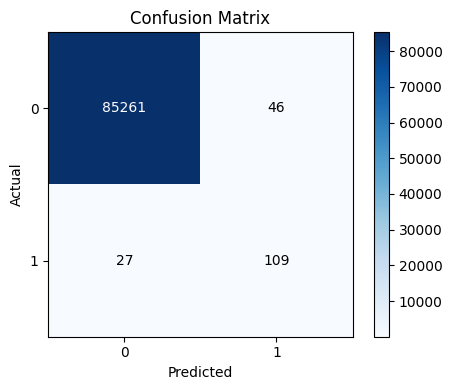

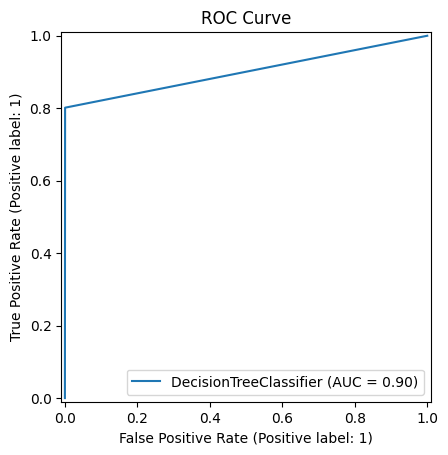

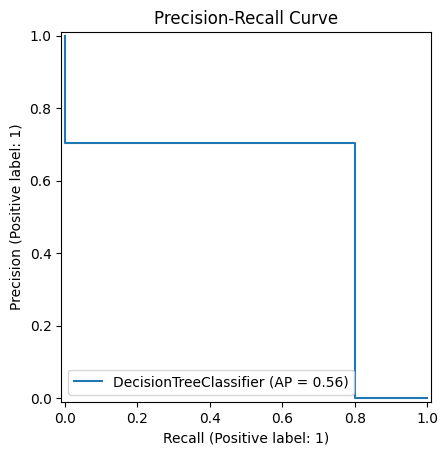

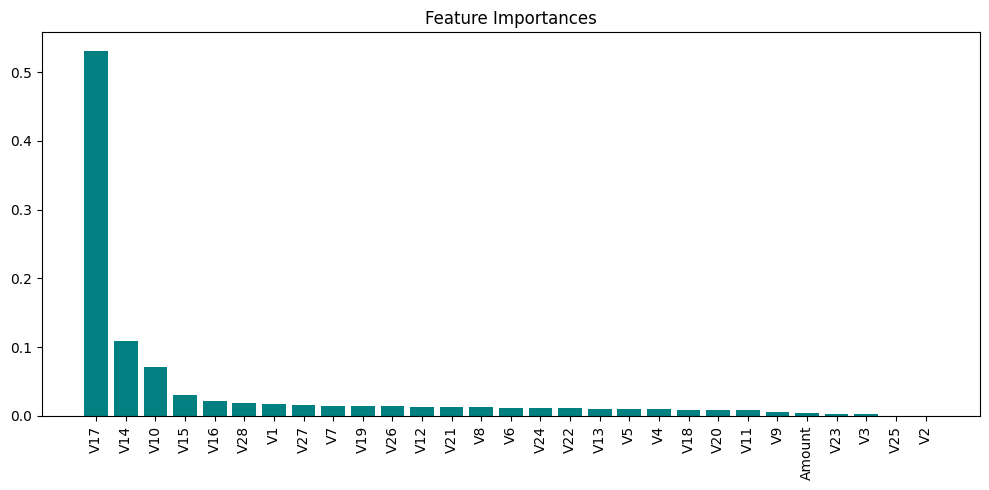

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, RocCurveDisplay, 
                             PrecisionRecallDisplay)

# Step 1: Load data
data = pd.read_csv('creditcard.csv')

# Step 2: Normalize 'Amount'
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Step 3: Drop 'Time'
data = data.drop(['Time'], axis=1)

# Step 4: Feature and target split
X = data.drop('Class', axis=1)
y = data['Class']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Step 7: Predict
y_pred = dtree.predict(X_test)

# Step 8: Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1])
plt.yticks([0, 1])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i,j] > cm.max()/2 else 'black')
plt.colorbar()
plt.tight_layout()
plt.show()

# Step 10: ROC Curve
RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# Step 11: Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(dtree, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

# (Optional) Step 12: Feature Importance
importances = dtree.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='teal', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()
